## plotting After-process data || 32 percent ||

In [1]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import numpy as np
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
import datetime 
import random
import statistics 
%matplotlib inline  


"""
unit >> bill
"""

import pandas as pd
import matplotlib.pyplot as plt
import MySQLdb
import time

from sympy import *
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

# x = raw_input('What about Ft?')
# Ft = float(x)
Ft = -0.048
t1 = 3.2484      # rate_1
t2 = 4.2218      # rate_2
t3 = 4.4217      # rate_3
ser = 38.22      # service_charge
u = symbols('u')

def bill(allpow):    
    ## Fundamental parameter
    if allpow == 0:
        bath = 0
    elif 1 <= allpow <= 150:
        bath = allpow*t1
    elif  151 <= allpow <= 400:
        power = allpow-150
        bath_1 = 150*t1
        bath_2 = power*t2
        bath = bath_1+bath_2
    else:
        power = allpow-150
        bath_1 = 150*t1
        power = power-250
        bath_2 = 250*t2
        bath_3 = power*t3
        bath = bath_1+bath_2+bath_3   
    service_price = 38.22  #permonth (fixed)   
    ## FT -33.2 satang/unit
    FT_price = allpow*Ft
    ## VAT 7%
    VAT_price = ((service_price+bath)+FT_price)*0.07
    bill = bath+service_price+FT_price+VAT_price
    return round(bill,2)

#### plotting month1 : October

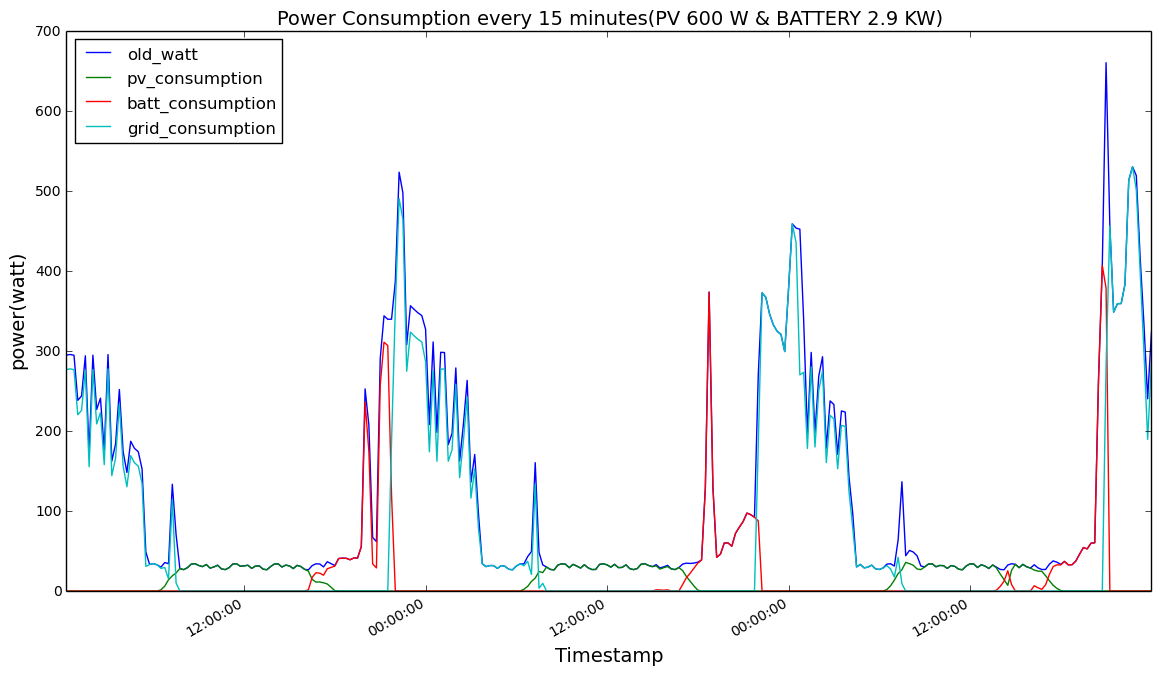

2016-10-01 00:00:00 to 2016-10-31 23:59:59
Total unit consumption || No-algorithm || equal to 383.111085 kW equal to 1595.63 bath
Total unit consumption || algorithm + PV&BATT ||equal to 354.7501002 kW equal to 1468.97 bath
Total power consumption from PEA equal to 260.374446 kW equal to 1047.49 bath
Total predicted watt 382.9847962
Total target watt 260.23570425
Total watt 248.94011753
Total PV_genaration 95.4908794189


In [2]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-10-18 00:00:00'
time_b = '2016-10-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Lab_main32 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2016-10-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-10-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Lab_main32 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month2 : November

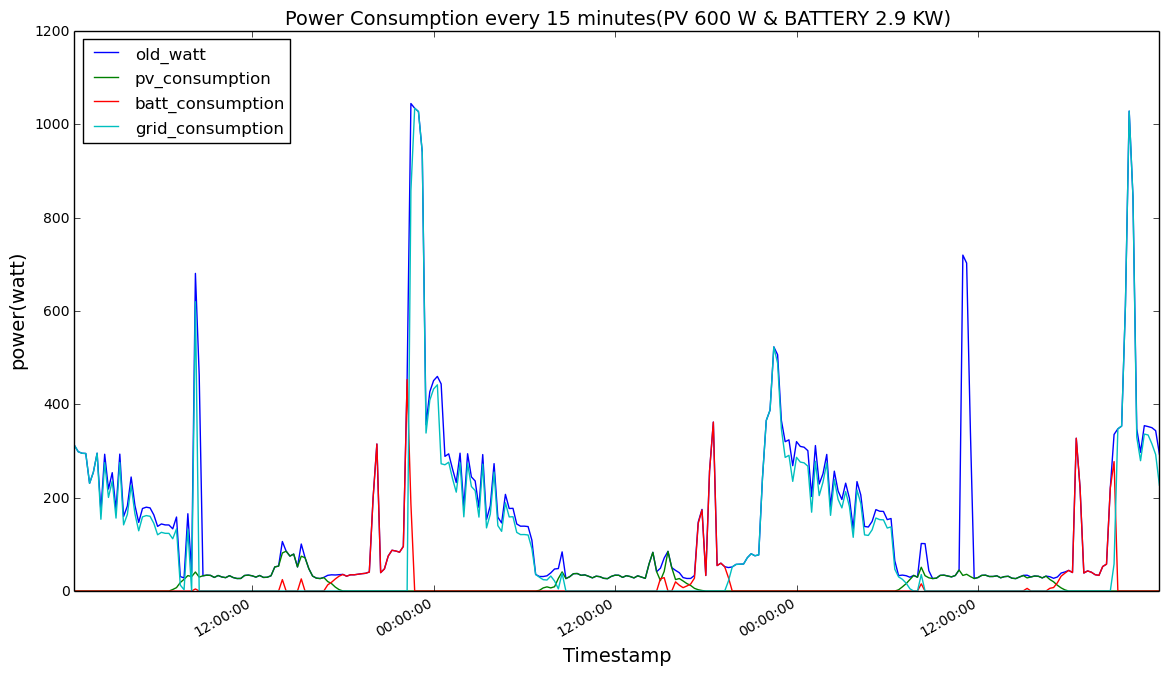

2016-11-01 00:00:00 to 2016-11-30 23:59:59
Total unit consumption || No-algorithm || equal to 386.4451217 kW equal to 1610.52 bath
Total unit consumption || algorithm + PV&BATT ||equal to 353.0008142 kW equal to 1461.15 bath
Total power consumption from PEA equal to 263.11090889 kW equal to 1059.71 bath
Total predicted watt 386.2071516
Total target watt 262.4252968
Total watt 251.03464854
Total PV_genaration 94.11936232


In [3]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-11-18 00:00:00'
time_b = '2016-11-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Lab_main32 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 30
time_a = pd.date_range('2016-11-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-11-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Lab_main32 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month3 : DECEMBER

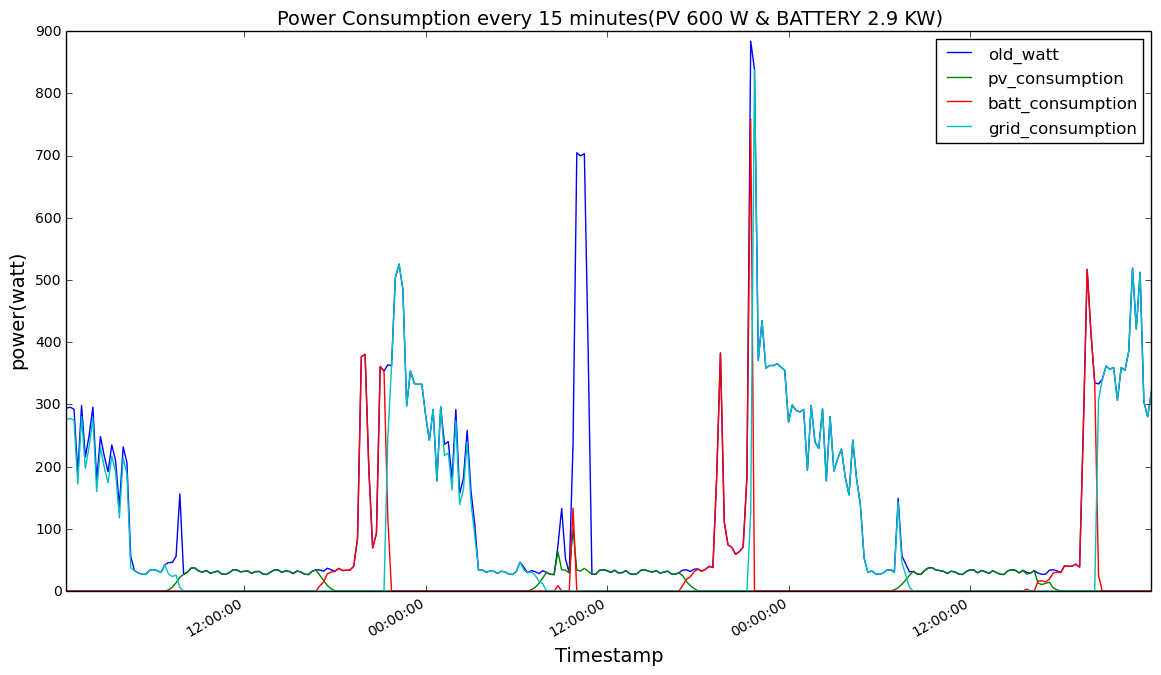

2016-12-01 00:00:00 to 2016-12-31 23:59:59
Total unit consumption || No-algorithm || equal to 404.8734149 kW equal to 1693.86 bath
Total unit consumption || algorithm + PV&BATT ||equal to 369.8571611 kW equal to 1536.43 bath
Total power consumption from PEA equal to 275.84289573 kW equal to 1116.57 bath
Total predicted watt 405.36069708
Total target watt 275.43998996
Total watt 263.484453102
Total PV_genaration 97.03365


In [4]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2016-12-18 00:00:00'
time_b = '2016-12-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Lab_main32 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2016-12-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2016-12-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Lab_main32 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month4 : JANUARY

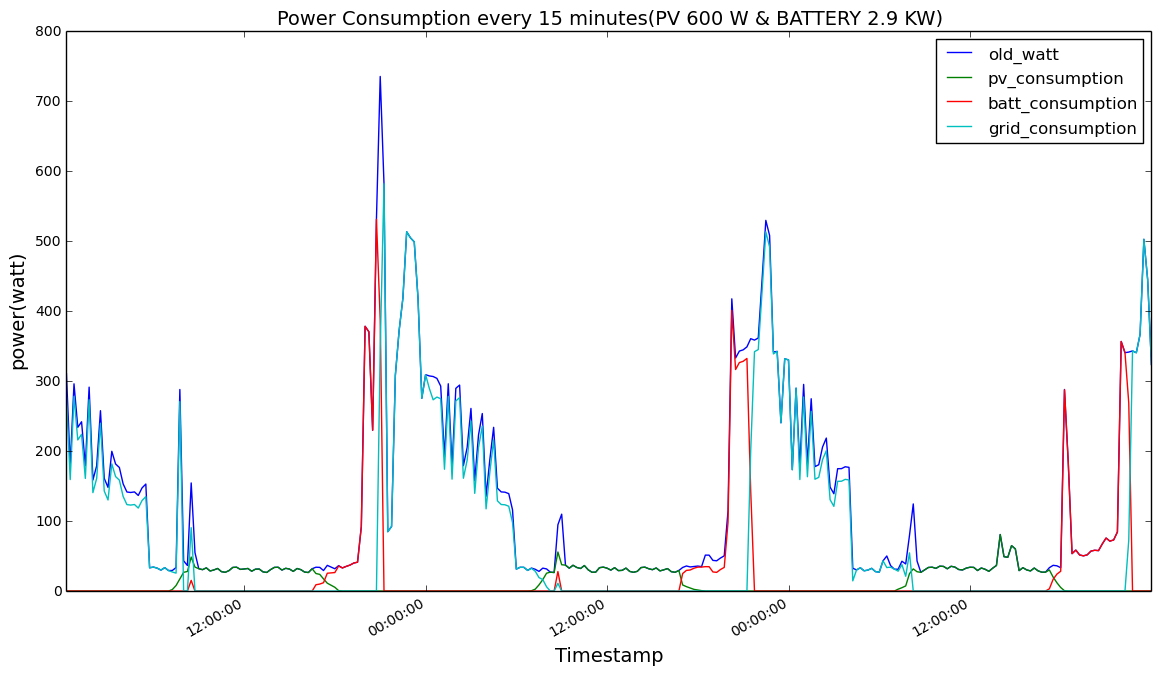

2017-01-01 00:00:00 to 2017-01-31 23:59:59
Total unit consumption || No-algorithm || equal to 399.8333564 kW equal to 1670.31 bath
Total unit consumption || algorithm + PV&BATT ||equal to 358.1126104 kW equal to 1483.98 bath
Total power consumption from PEA equal to 269.160134665 kW equal to 1086.72 bath
Total predicted watt 399.7487256
Total target watt 271.6267055
Total watt 259.83667164
Total PV_genaration 92.9763


In [5]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-01-18 00:00:00'
time_b = '2017-01-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Lab_main32 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2017-01-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-01-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Lab_main32 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month5 : FEBRUAY

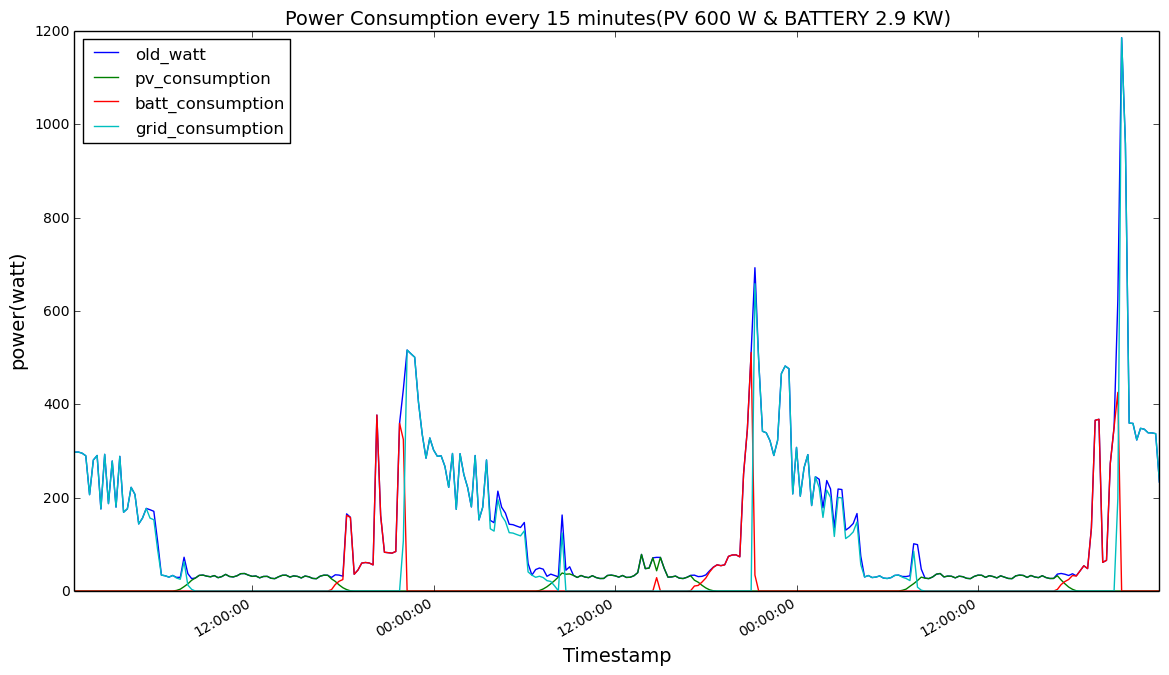

2017-02-01 00:00:00 to 2017-02-28 23:59:59
Total unit consumption || No-algorithm || equal to 342.6839014 kW equal to 1415.08 bath
Total unit consumption || algorithm + PV&BATT ||equal to 324.1726232 kW equal to 1332.41 bath
Total power consumption from PEA equal to 233.55737959 kW equal to 927.72 bath
Total predicted watt 342.682739753
Total target watt 232.850738815
Total watt 222.74378084
Total PV_genaration 95.577225


In [6]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-02-18 00:00:00'
time_b = '2017-02-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Lab_main32 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 28
time_a = pd.date_range('2017-02-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-02-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Lab_main32 WHERE Timestamp >= '%s'AND  Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 

#### plotting month6 : MARCH

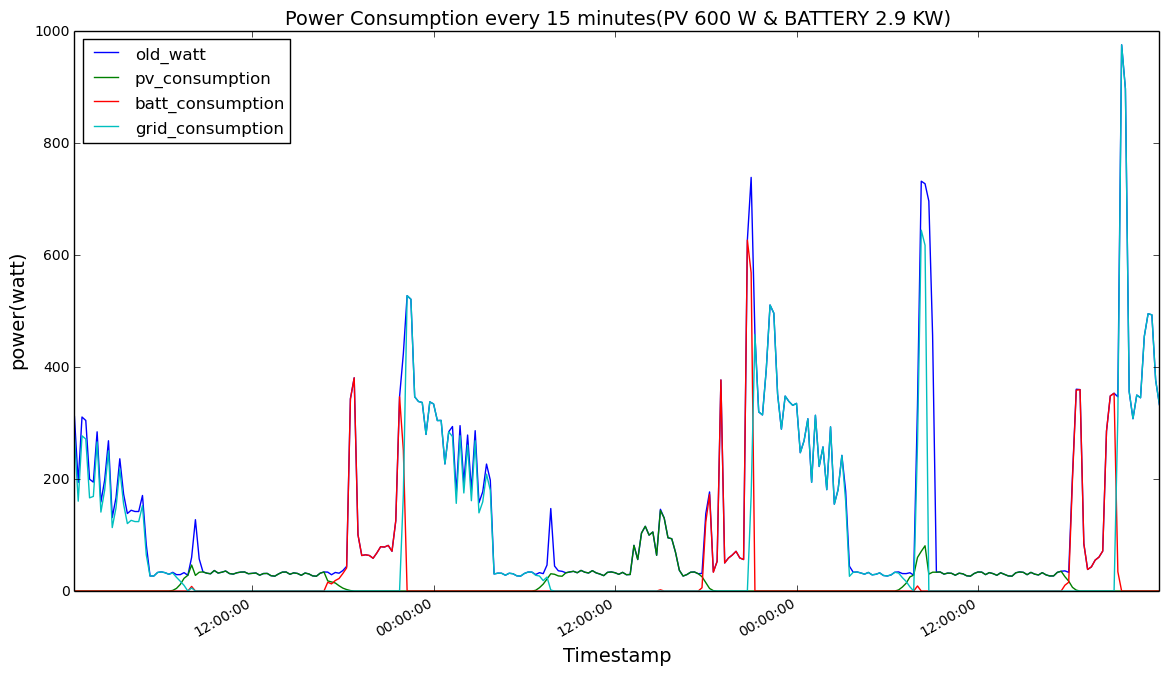

2017-03-01 00:00:00 to 2017-03-31 23:59:59
Total unit consumption || No-algorithm || equal to 390.4722818 kW equal to 1628.5 bath
Total unit consumption || algorithm + PV&BATT ||equal to 371.4096422 kW equal to 1543.37 bath
Total power consumption from PEA equal to 265.00745378 kW equal to 1068.18 bath
Total predicted watt 390.4630029
Total target watt 265.3170967
Total watt 253.800951885
Total PV_genaration 114.374025


In [7]:
conn= MySQLdb.connect("localhost","conn","hems")
cursor = conn.cursor()

time_a = '2017-03-18 00:00:00'
time_b = '2017-03-20 23:59:59'

query= "SELECT Timestamp,old_watt,pv_consumption,batt_consumption,grid_consumption FROM thesis.Lab_main32 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; " % (time_a,time_b)
df = pd.read_sql(query, conn,index_col=['Timestamp'])
fig, ax = plt.subplots(figsize=(14*1, 8))
ax.set_title('Power Consumption every 15 minutes(PV 600 W & BATTERY 2.9 KW)', fontsize=14)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('power(watt)', fontsize=14)
df.plot(ax=ax)
plt.show()

d = 31
time_a = pd.date_range('2017-03-01 00:00:00', periods=96*d, freq='15T')
time_b = pd.date_range('2017-03-01 00:14:59', periods=96*d, freq='15T')
conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
print time_a[0],"to",time_b[-1]
query0 = "SELECT * FROM thesis.Lab_main32 WHERE Timestamp >= '%s'AND Timestamp <= '%s'; "% (time_a[0],time_b[-1])
df = pd.read_sql(query0, conn)
print "Total unit consumption || No-algorithm || equal to",df.old_watt.sum()/1000,"kW equal to", bill(df.old_watt.sum()/1000),"bath"
print "Total unit consumption || algorithm + PV&BATT ||equal to",df.watt.sum()/1000,"kW equal to", bill(df.watt.sum()/1000),"bath"
print "Total power consumption from PEA equal to",df.grid_consumption.sum()/1000,"kW equal to", bill(df.grid_consumption.sum()/1000),"bath"
print "Total predicted watt", df.predicted_watt.sum()/1000
print "Total target watt", df.target_watt.sum()/1000
print "Total watt", df.predicted_watt.sum()/1000*(1.0-0.35)
print "Total PV_genaration", df.PV_genarator.sum()/1000 